In [1]:
import pandas as pd
import nltk
import re

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df['cleaned_content'] =  [re.sub(r"[\([{'',})\]]", "", str(x)) for x in df['cleaned_content']]

In [4]:
df['tokenized_sents'] = df['cleaned_content'].apply(lambda row: nltk.word_tokenize(row))
df['tokenized_sents']

0        [pokok, lupa, dukung, perintah, proses, vaksin...
1                              [jurus, jitu, lawan, covid]
2        [keren, banget, kawan, proses, vaksinasi, taha...
3        [jaga, jarak, patuh, protokol, sehat, terap, k...
4        [datang, vaksin, indonesia, manfaat, kawan, no...
                               ...                        
21794                                                [nan]
21795    [vaksinasi, ramadhan, aman, batal, puasa, inco...
21796                                 [cerita, pulak, wey]
21797                            [dukung, wajib, difollow]
21798     [vaksin, made, awan, ratus, tokoh, dukung, bpom]
Name: tokenized_sents, Length: 21799, dtype: object

In [5]:
def stopword_ratio(t,stops = set(['vaksinuntukkita','upayalawanpandemi','vaksinasinasional','vaksin', 'yukk', 'banget', 'tn', 
                                  'legiatan','guys', 'guyss', 'le', 'enggk', 'bumnuntuknegeri', 'vaks', 'bersatumelawankorona',
                                  'vaksincovid', 'vaksinsiap', 'vaksinhalal', 'vaksincorona', 'lans', 'vaksinun', 'vaksinuntukk',
                                  'yookk', 'gais', 'neng', 'wae', 'gaiss', 'lawancovid', 'sukseskanvaksinasi', 'ayovaksin', 'adaptasikebia',
                                  'pon', 'huku', 'spaceantixlarries', 'thegooddocro', 'bedandbreakfast', 'vaksinuntu', 'untu', 
                                  'vaksinas', 'melakuka', 'seg', 'dikelu', 'infeks', 'kat', 'tertu', 'memb', 'yok', 'vaksi', 'vaksinnusantara','wey',
                                 'pulak', 'banget', 'vak', 'vaksin', 'kawan', 'yuk', 'vaksin', 'upaya', 'lawan', 'pandemi', 'daftarakan', 'va', 'vaksingratis',
                                 'up', 'mari', 'un', 'jut', 'bersa', 'div', 'sahabat', 'fyi', 'incompete', 'can', 'govt', 'start', 'more', 'jejas', 
                                 'any', 'erti', 'ditu', 'moga', 'kit', 'sama', 'nan', 'this', 'bara', 'lh', 'nuntuknegeri', 'good', 'doctor', 
                                 'drive', 'thru', 'bara', 'kelu', 'la', 'to', 'lh', 'Ih', 'ih', 'puluh', 'gera', 'negxperlu', 'negxperlu', 'vaksingratis', 'kabaintelkam', 'marsekal', 'nasional', 
                                 'yaak', 'teman', 'kesehata', 'iyaa', 'ning', 'incovid', 'inasicovid', 'skuyy', 'ol', 'mere', 'vaksina',
                                 'jan', 'dari', 'apa', 'nyokk', 'lansai', 'biar', 'guis', 'hayuk', 'lil', 'ce', 'lansi', 'jadi', 'alamin', 'sesuai', 'oya', 'yeaayy',
                                 'negar', 'takyah', 'gambarnyaa', 'tidak', 'pasti', 'yupss', 'ajaa', 'jga', 'ortu', 'chuping',
                                 'yas', 'yup', 'gausahh', 'yakan', 'tup', 'kuyy', 'skuy', 'ayok', 'lap', 'heheheehe', 'mbak',
                                 'vak', 'ses', 'ajaa', 'tuhh', 'yeayy', 'gaskeun', 'gengs', 'yaas', 'kitaa', 'byebye', 'ayok',
                                 'sobatt', 'nihh', 'men', 'sen', 'tuu'])):
    res=[]
    for token in t:
        if token not in stops:
            res.append(token)
    return res

In [6]:
df.drop(index=df[df['cleaned_content'].str.contains('bosnia')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('malay')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('haritu')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('yalls')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('cakap')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('derma')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('lepastu')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('raja')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('boruneodao')].index, inplace=True)
df.drop(index=df[df['cleaned_content'].str.contains('cikgu')].index, inplace=True)

In [7]:
stopwords_ratio=[]
for i in df['tokenized_sents']:
       stopwords_ratio.append(stopword_ratio(i))
df['tokenized_sents']=stopwords_ratio

In [8]:
df

,Unnamed: 0,id_tweet,username,name,tweet,hashtags,geo.location,time,content,cleaned_content,tokenized_sents
0,0,1378299640282423297,PersijaJKT14,Info Persija Jakarta,Pokoknya jangan lupa tetep dukung pemerintah d...,[],NaN,2021-04-03T17:53:41.301407+07:00,Pokoknya jangan lupa tetep dukung pemerintah d...,pokok lupa dukung perintah proses vaksinasi ta...,"[pokok, lupa, dukung, perintah, proses, vaksin..."
1,1,1378299685224345603,RaliensyahRani,Rani Raliensyah,Jurus jitu melawan Covid-19\n\n,"[{'text': 'VaksinUntukKita', 'indices': [28, 4...",NaN,2021-04-03T17:53:51.957971+07:00,Jurus jitu melawan Covid-19\n\n,jurus jitu lawan covid,"[jurus, jitu, covid]"
2,2,1378299694728716288,PersijaJKT14,Info Persija Jakarta,Keren banget guys ternyata proses vaksinasi ta...,[],NaN,2021-04-03T17:53:54.271293+07:00,Keren banget guys ternyata proses vaksinasi ta...,keren banget kawan proses vaksinasi tahap bang...,"[keren, proses, vaksinasi, tahap, manfaat, fun..."
3,3,1378299743277740036,PersijaJKT14,Info Persija Jakarta,Tetap jaga jarak dan tetap patuhi protokol kes...,"[{'text': 'VaksinUntukKita', 'indices': [87, 1...",NaN,2021-04-03T17:54:05.884342+07:00,Tetap jaga jarak dan tetap patuhi protokol kes...,jaga jarak patuh protokol sehat terap kawan,"[jaga, jarak, patuh, protokol, sehat, terap]"
4,4,1378299793806520320,PersijaJKT14,Info Persija Jakarta,Ternyata kedatangan vaksin ke indonesia itu ba...,[],NaN,2021-04-03T17:54:17.907705+07:00,Ternyata kedatangan vaksin ke indonesia itu ba...,datang vaksin indonesia manfaat kawan nolak vak,"[datang, indonesia, manfaat, nolak]"
...,...,...,...,...,...,...,...,...,...,...,...
21794,21794,1383451724241784835,tribunkaltim,TribunKaltim.co,https://t.co/dS362YdYv0\n,"[{'text': 'VaksinUntukKita', 'indices': [24, 4...","Balikpapan, Indonesia",2021-04-17T23:05:58.503249+07:00,https://t.co/dS362YdYv0\n,nan,[]
21795,21795,1383434664514187270,BesokPagi_,Besok Pagi,"Vaksinasi Saat Ramadhan Aman, Tak Batalkan Pua...","[{'text': 'indonesia', 'indices': [54, 64]}, {...",NaN,2021-04-17T21:58:11.376465+07:00,"Vaksinasi Saat Ramadhan Aman, Tak Batalkan Pua...",vaksinasi ramadhan aman batal puasa incovid in...,"[vaksinasi, ramadhan, aman, batal, puasa]"
21796,21796,1383445379161620481,zimgodo,Wow! Penyelamat Donia,"Ape cerita pulak ni wey, @Khairykj 🤦‍♂️",[],Dalam Kandang Kandung Kalimah,2021-04-17T22:40:45.787456+07:00,"Ape cerita pulak ni wey, @Khairykj 🤦‍♂️",cerita pulak wey,[cerita]
21797,21797,1383457752710713350,La_hedo,#AyoVaksin_MaskerWajib,@ninikwafiroh Yang mendukung \nwajib difollow..,"[{'text': 'VaksinNusantara', 'indices': [29, 4...",NaN,2021-04-17T23:29:55.786442+07:00,@ninikwafiroh Yang mendukung \nwajib difollow..,dukung wajib difollow,"[dukung, wajib, difollow]"


In [9]:
df['cleaned_content'] =  [re.sub(r"[\([{'',})\]]", "", str(x)) for x in df['tokenized_sents']]

In [10]:
all_words = [word for tokens in df['tokenized_sents'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tokenized_sents']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

105445 words total, with a vocabulary size of 4846
Max tweet length is 17


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

<Figure size 1500x800 with 1 Axes>

In [12]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [13]:
data_lemmatized = df['tokenized_sents']

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'C://new_mallet//mallet-2.0.8//'})
mallet_path = 'C://new_mallet//mallet-2.0.8//bin//mallet' # update this path

ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

result=(ldamallet.show_topics(num_topics=20,num_words=10,formatted=False))
for each in result:
    print(each)

(0, [('jaga', 0.12962962962962962), ('pokok', 0.06152263374485597), ('kasih', 0.0588477366255144), ('hati', 0.05864197530864197), ('terima', 0.05452674897119342), ('waspada', 0.03847736625514403), ('tipu', 0.03271604938271605), ('kurang', 0.03065843621399177), ('pesan', 0.025308641975308643), ('makna', 0.025102880658436213)])
(1, [('tua', 0.1945242197970515), ('ajak', 0.14838215584912887), ('keluarga', 0.11334482098410875), ('laksana', 0.10300593528623396), ('kerabat', 0.08194524219797052), ('usia', 0.0511200459506031), ('atas', 0.027761822707256367), ('anak', 0.023932605782117557), ('bakti', 0.021635075627034272), ('saudara', 0.02106069308826345)])
(2, [('laksana', 0.09040016587186399), ('covid', 0.04934687953555878), ('pulih', 0.041675305826249225), ('negara', 0.03960190752643583), ('anak', 0.033589052456976985), ('tangan', 0.028820236367406177), ('kena', 0.026124818577648767), ('selamat', 0.023014721127928676), ('bekal', 0.020319303338171262), ('erick', 0.016379846568525813)])
(3, [

In [16]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=35, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=25, step=1)

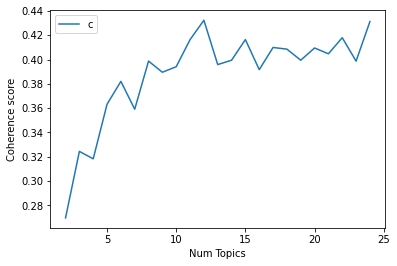

In [19]:
# Show graph
limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2696
Num Topics = 3  has Coherence Value of 0.3243
Num Topics = 4  has Coherence Value of 0.3182
Num Topics = 5  has Coherence Value of 0.3632
Num Topics = 6  has Coherence Value of 0.382
Num Topics = 7  has Coherence Value of 0.3591
Num Topics = 8  has Coherence Value of 0.3987
Num Topics = 9  has Coherence Value of 0.3895
Num Topics = 10  has Coherence Value of 0.3941
Num Topics = 11  has Coherence Value of 0.4164
Num Topics = 12  has Coherence Value of 0.4323
Num Topics = 13  has Coherence Value of 0.3958
Num Topics = 14  has Coherence Value of 0.3994
Num Topics = 15  has Coherence Value of 0.4164
Num Topics = 16  has Coherence Value of 0.3916
Num Topics = 17  has Coherence Value of 0.4099
Num Topics = 18  has Coherence Value of 0.4085
Num Topics = 19  has Coherence Value of 0.3994
Num Topics = 20  has Coherence Value of 0.4095
Num Topics = 21  has Coherence Value of 0.4047
Num Topics = 22  has Coherence Value of 0.418
Num Topics = 23  has Co

In [202]:
# Select the model and print the topics
optimal_model = model_list[10]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=5))

[(0,
  '0.220*"sehat" + 0.115*"protokol" + 0.071*"jaga" + 0.066*"disiplin" + '
  '0.032*"hati"'),
 (1,
  '0.164*"tua" + 0.160*"lansia" + 0.138*"ajak" + 0.074*"damping" + '
  '0.066*"keluarga"'),
 (2,
  '0.290*"vaksinasi" + 0.145*"dukung" + 0.055*"program" + 0.047*"patuh" + '
  '0.045*"pokok"'),
 (3,
  '0.103*"cepat" + 0.079*"proses" + 0.050*"sentra" + 0.037*"lupa" + '
  '0.034*"bumn"'),
 (4,
  '0.294*"vaksinasi" + 0.151*"covid" + 0.036*"info" + 0.034*"percaya" + '
  '0.020*"khawatir"'),
 (5,
  '0.243*"indonesia" + 0.155*"covid" + 0.142*"update" + 0.141*"kembang" + '
  '0.140*"tanggal"'),
 (6,
  '0.209*"lansia" + 0.128*"daftar" + 0.065*"bantu" + 0.039*"kebal" + '
  '0.036*"manfaat"'),
 (7,
  '0.262*"puasa" + 0.151*"batal" + 0.084*"mui" + 0.082*"fatwa" + '
  '0.077*"ramadhan"'),
 (8,
  '0.192*"aman" + 0.152*"ragu" + 0.101*"efektif" + 0.055*"takut" + '
  '0.049*"bukti"'),
 (9,
  '0.210*"vaksinasi" + 0.111*"laksana" + 0.088*"prokes" + 0.074*"lindung" + '
  '0.045*"corona"'),
 (10,
  '0.164

IndexError: list index out of range

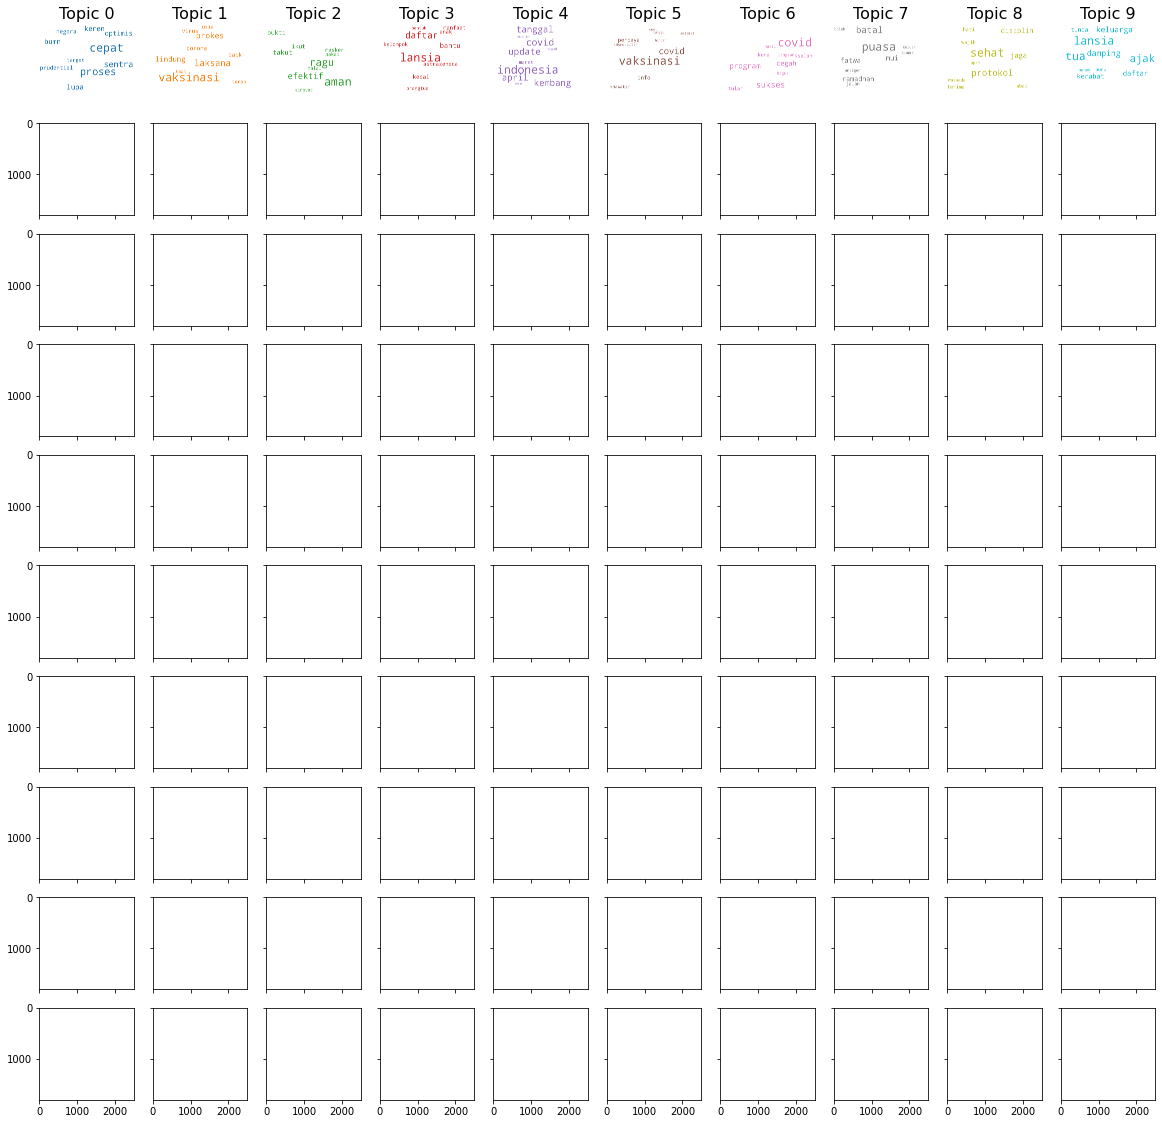

In [229]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  #collocation_threshold=30,
                  colormap= 'tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=2.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharex=True, sharey=True, squeeze=False)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    #plt.gca().set_xlim(right=20)
    #plt.gca().set_ylim(top=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## mcolors.XKCD_COLORS

In [22]:
from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [23]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [24]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

In [25]:
tm_results = ldamallet[corpus]

In [26]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [54]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=6)] for n in range(0, ldamallet.num_topics)]

In [58]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 7)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
Term1,jaga,tua,laksana,lupa,aman,prokes,vaksinasi,lansia,vaksinasi,puasa,vaksinasi,puasa,covid,perintah,vaksinasi,update,lansia,vaksinasi,sehat,vaksinasi
Term2,pokok,ajak,covid,kebal,efektif,lindung,covid,daftar,cepat,batal,covid,mui,cegah,informasi,indonesia,kembang,daftar,jalan,protokol,dukung
Term3,kasih,keluarga,pulih,masker,ragu,vaksinasi,indonesia,damping,proses,ramadhan,tuju,fatwa,info,manfaat,sukses,tanggal,ajak,sentra,disiplin,program
Term4,hati,laksana,negara,kelompok,bukti,terap,optimis,bantu,keren,ragu,suntik,batal,percaya,astrazeneca,program,april,tunda,bumn,patuh,ikut
Term5,terima,kerabat,anak,pakai,corona,baik,target,tua,langkah,khawatir,rakyat,simak,tular,makan,semangat,indonesia,buru,tenang,wajib,prudential


In [60]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(6)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1921,"sehat, dukung, protokol, program, prokes, jaga...","[pokok, lupa, dukung, perintah, proses, vaksin..."
1,1,2.0,0.1761,"aman, ragu, efektif, lindung, takut, bukti, co...","[jurus, jitu, covid]"
2,2,5.0,0.2261,"vaksinasi, cepat, ajak, proses, keluarga, suks...","[keren, proses, vaksinasi, tahap, manfaat, fun..."
3,3,0.0,0.2560,"sehat, dukung, protokol, program, prokes, jaga...","[jaga, jarak, patuh, protokol, sehat, terap]"
4,4,5.0,0.2099,"vaksinasi, cepat, ajak, proses, keluarga, suks...","[datang, indonesia, manfaat, nolak]"
5,5,0.0,0.1795,"sehat, dukung, protokol, program, prokes, jaga...","[indonesia, sehat]"


In [62]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(6)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2896,"sehat, dukung, protokol, program, prokes, jaga...",[lansia]
1,1.0,0.3299,"lansia, daftar, tua, damping, bantu, kerabat, ...","[aman, manfaat, who, rilis, manfaat, astrazene..."
2,2.0,0.3118,"aman, ragu, efektif, lindung, takut, bukti, co...","[yakali, vaksinasi, kasih, sentra, bumn, ribet]"
3,3.0,0.3169,"puasa, vaksinasi, batal, laksana, jalan, mui, ...","[lansia, tingkat, imun, tubuh]"
4,4.0,0.2690,"covid, vaksinasi, indonesia, update, kembang, ...","[daftar, vaksinasi, lansia, akses]"
5,5.0,0.3005,"vaksinasi, cepat, ajak, proses, keluarga, suks...","[gampang, daftar, vaksinasi, lansia, rumah, ti..."


In [63]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(6)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"sehat, dukung, protokol, program, prokes, jaga...",5804.0,0.2692
1.0,2.0,"aman, ragu, efektif, lindung, takut, bukti, co...",4268.0,0.1979
2.0,5.0,"vaksinasi, cepat, ajak, proses, keluarga, suks...",3710.0,0.1720
3.0,0.0,"sehat, dukung, protokol, program, prokes, jaga...",3052.0,0.1415
4.0,5.0,"vaksinasi, cepat, ajak, proses, keluarga, suks...",2077.0,0.0963
5.0,0.0,"sehat, dukung, protokol, program, prokes, jaga...",2653.0,0.1230
